In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier

In [2]:
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report,roc_curve
from tqdm import tqdm

# AS we  have imported necessary modules now we can start with

# EDA (Exploratory Data Analysis) with wrangling of data and visualizing

# The necessary thing for out statiscal analysis as well insights of our data 

# Last steps would be data imputations , merging , cross validations , 

# Hyperparmaters tuning and visualization of every algowhat we used what are

# It's result with Time consumption of algos producing the results

In [3]:
from subprocess import check_output

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0.0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1.0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2.0,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [7]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
sample.head()
members.shape
train.info()
print("\n")
songs.info()
print("\n")
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19932 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 937.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
song_id        39999 non-null object
song_length    39999 non-null int64
genre_ids      39282 non-null object
artist_name    39999 non-null object
composer       23203 non-null object
lyricist       10913 non-null object
language       39999 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
ci

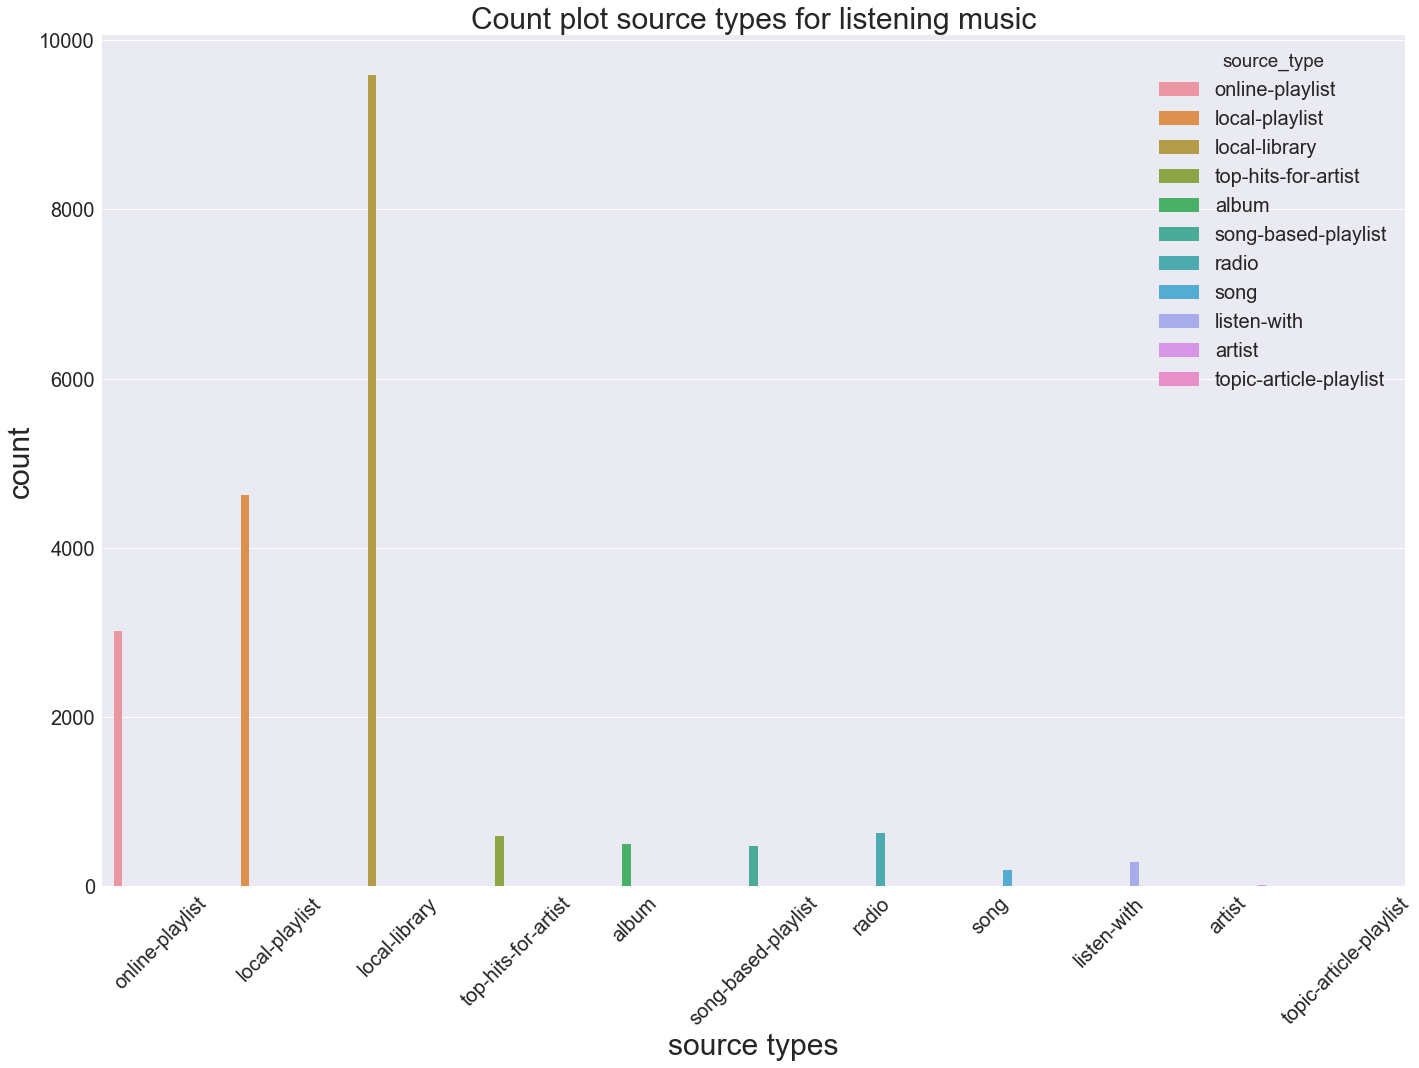

In [9]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

# First visualization we can see as if local library are more perffered than any other source types as well after that online playlist and local playlist and other features are showing less importance but can't say anything right now as we handn't deal with cleaning , imputing , stats 

# But as far we are sure are answers for buliding this systems in revolving maximum issues around local library see next what other result say 

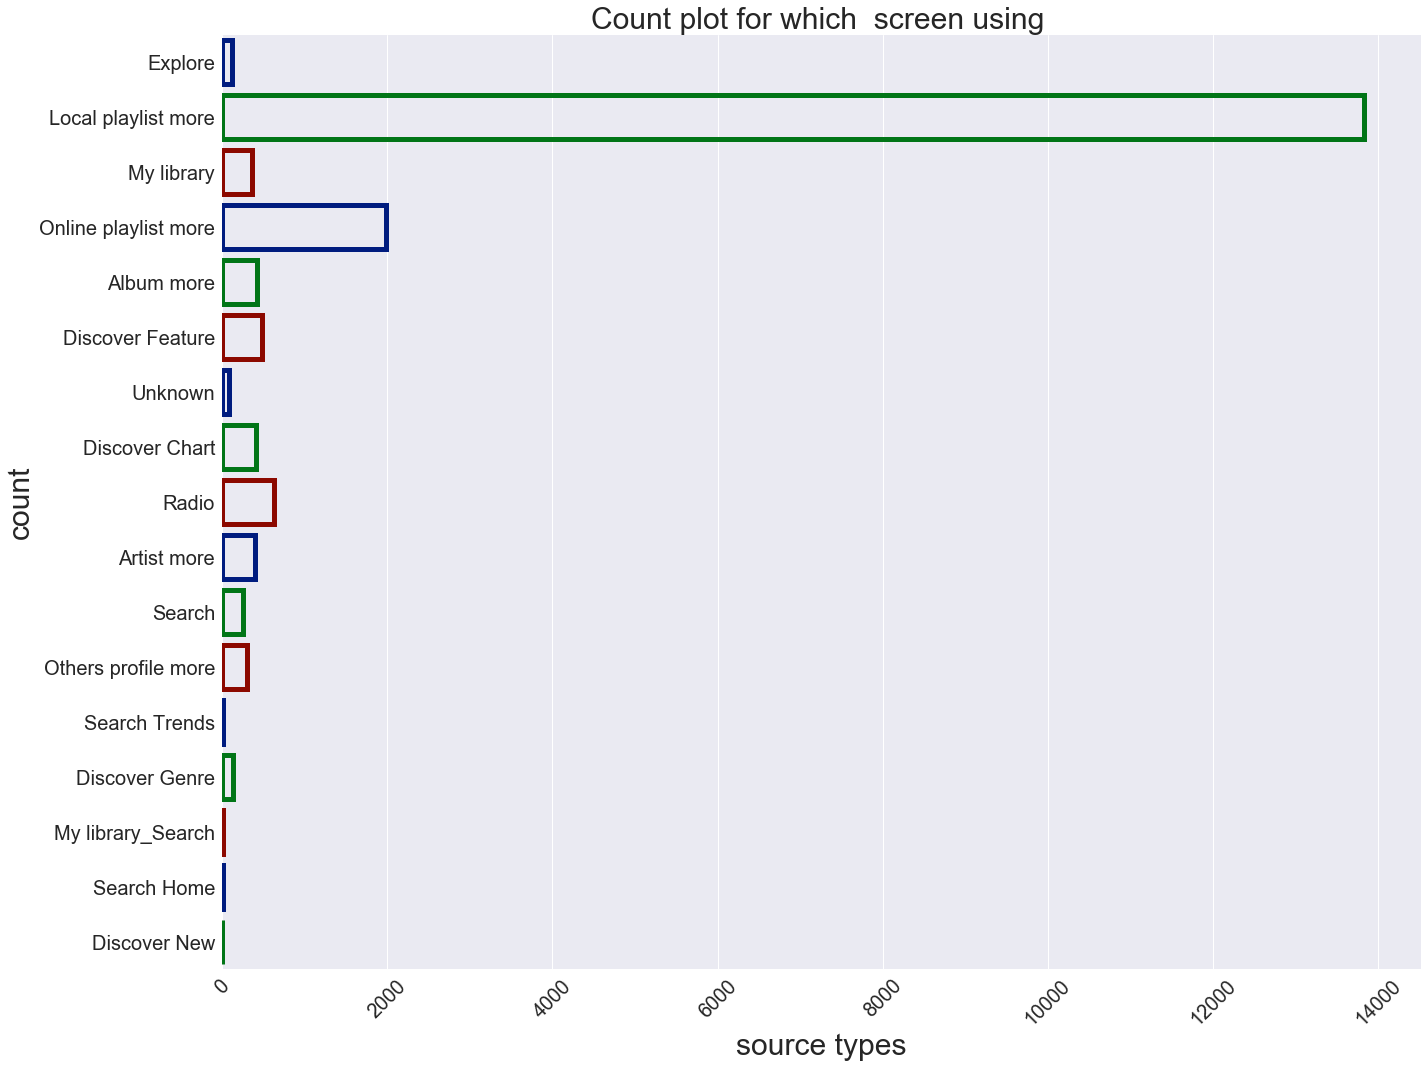

In [10]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

# Second Visualization is telling us that most of the users are listenning local      
# playlist more means the app which is provided by the company they are using them apart from this we can also see that after this most the users are coming back to the songs by online playlist sources 

# Very less from the other different sources means are outliers , variance and std deviations are in 2 areas local libs and online playlist 


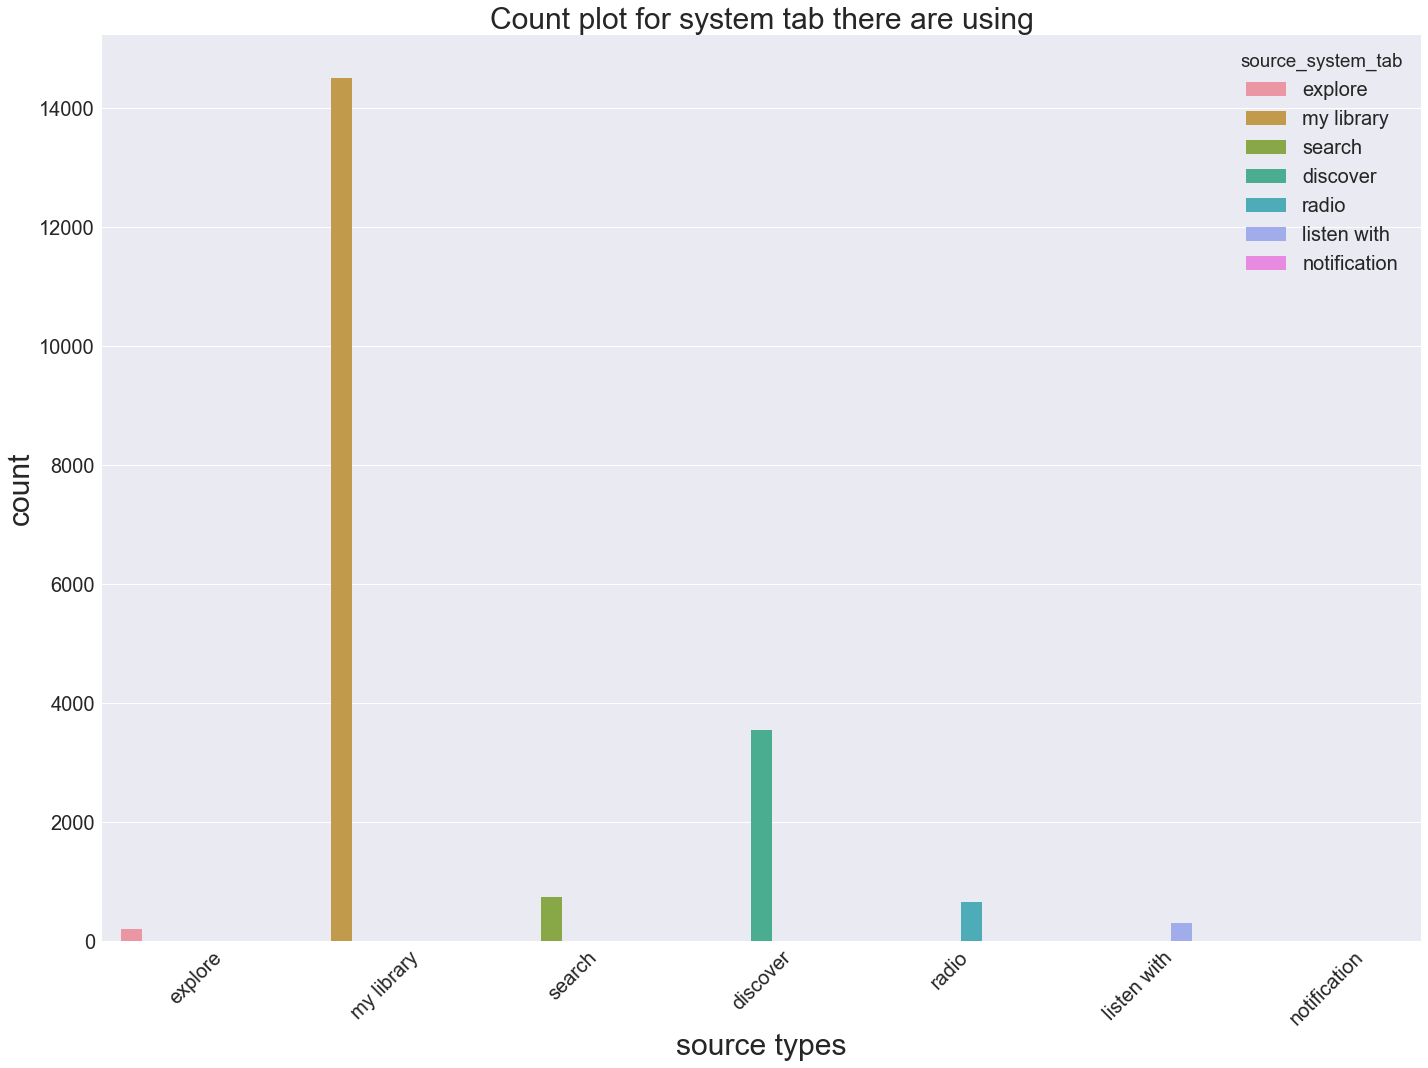

In [11]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)
plt.tight_layout()

# so anyone who has installed KKBOX app we can see most of the users are going back to there songs via my library rather discovering them means there are different sources they can go back but most preffered one is my library 

# now doing some visualiaztion in members.csv

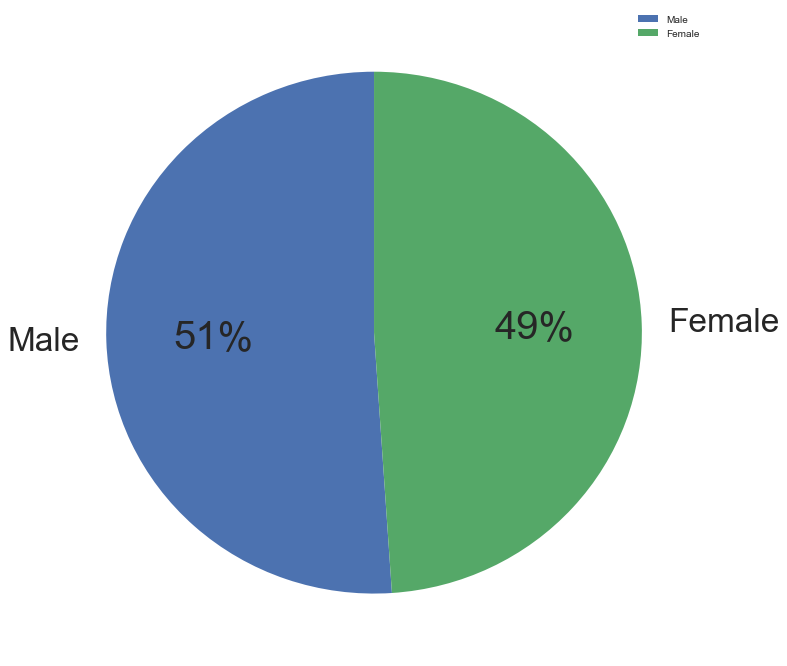

In [12]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()


# As we can see we have male users more now visualization has to be done in this manner like from how many types genders which are popular ways to go back in there playlist

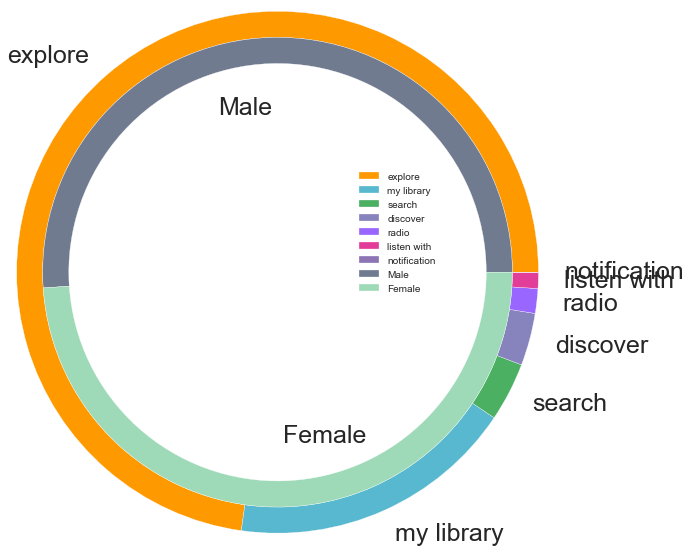

In [13]:
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
# Make data: I have 3 groups and 7 subgroups
group_names=['explore','my library','search','discover','radio','listen with','notification']
group_size=pd.value_counts(train.source_system_tab)
subgroup_names=['Male','Female']
subgroup_size=pd.value_counts(members.gender)
 
# Create colors
a, b, c,d,e,f,g,h=[plt.cm.autumn, plt.cm.GnBu, plt.cm.YlGn,plt.cm.Purples,plt.cm.cool,plt.cm.RdPu,plt.cm.BuPu,plt.cm.bone]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, texts= ax.pie(group_size, radius=3.0,labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6), e(0.6), f(0.6),g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, texts1 = ax.pie(subgroup_size, radius=3.0-0.3, labels=subgroup_names, labeldistance=0.7, colors=[h(0.5), b(0.4)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.margins(0,0)
for t in texts:
    t.set_size(25.0)
for t in texts1:
    t.set_size(25.0)    
plt.legend() 
# show it
plt.show()


# Inferences we can draw from this chart that among Men exploration method is only way they are using while females are using every possible way to get back their music of choices , in real world this thing also very much similar that men focuses in one direction in depth whereas women focuses in every possible direction but not in depth

# We are moving in right direction of building a good accurate systems

# now some statistics inferences 
# as we have numeric data in tow csv files and rest of the files with categorical data so members.csv file with 2 columns in numeric and song.csv 

In [14]:
print(members.describe())

               city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            2.004033e+07   
25%        1.000000      0.000000        4.000000            2.012103e+07   
50%        1.000000      0.000000        7.000000            2.015090e+07   
75%       10.000000     25.000000        9.000000            2.016110e+07   
max       22.000000   1051.000000       16.000000            2.017023e+07   

       expiration_date  
count     3.440300e+04  
mean      2.016901e+07  
std       7.320925e+03  
min       1.970010e+07  
25%       2.017020e+07  
50%       2.017091e+07  
75%       2.017093e+07  
max       2.020102e+07  


In [15]:
print(songs.describe())

        song_length      language
count  3.999900e+04  39999.000000
mean   2.462405e+05     26.471512
std    1.227400e+05     23.325434
min    4.922000e+03     -1.000000
25%    1.994120e+05      3.000000
50%    2.336390e+05     24.000000
75%    2.731475e+05     52.000000
max    4.748341e+06     59.000000


# doing stats test on members.csv

Text(0.5,0,'registration time ')

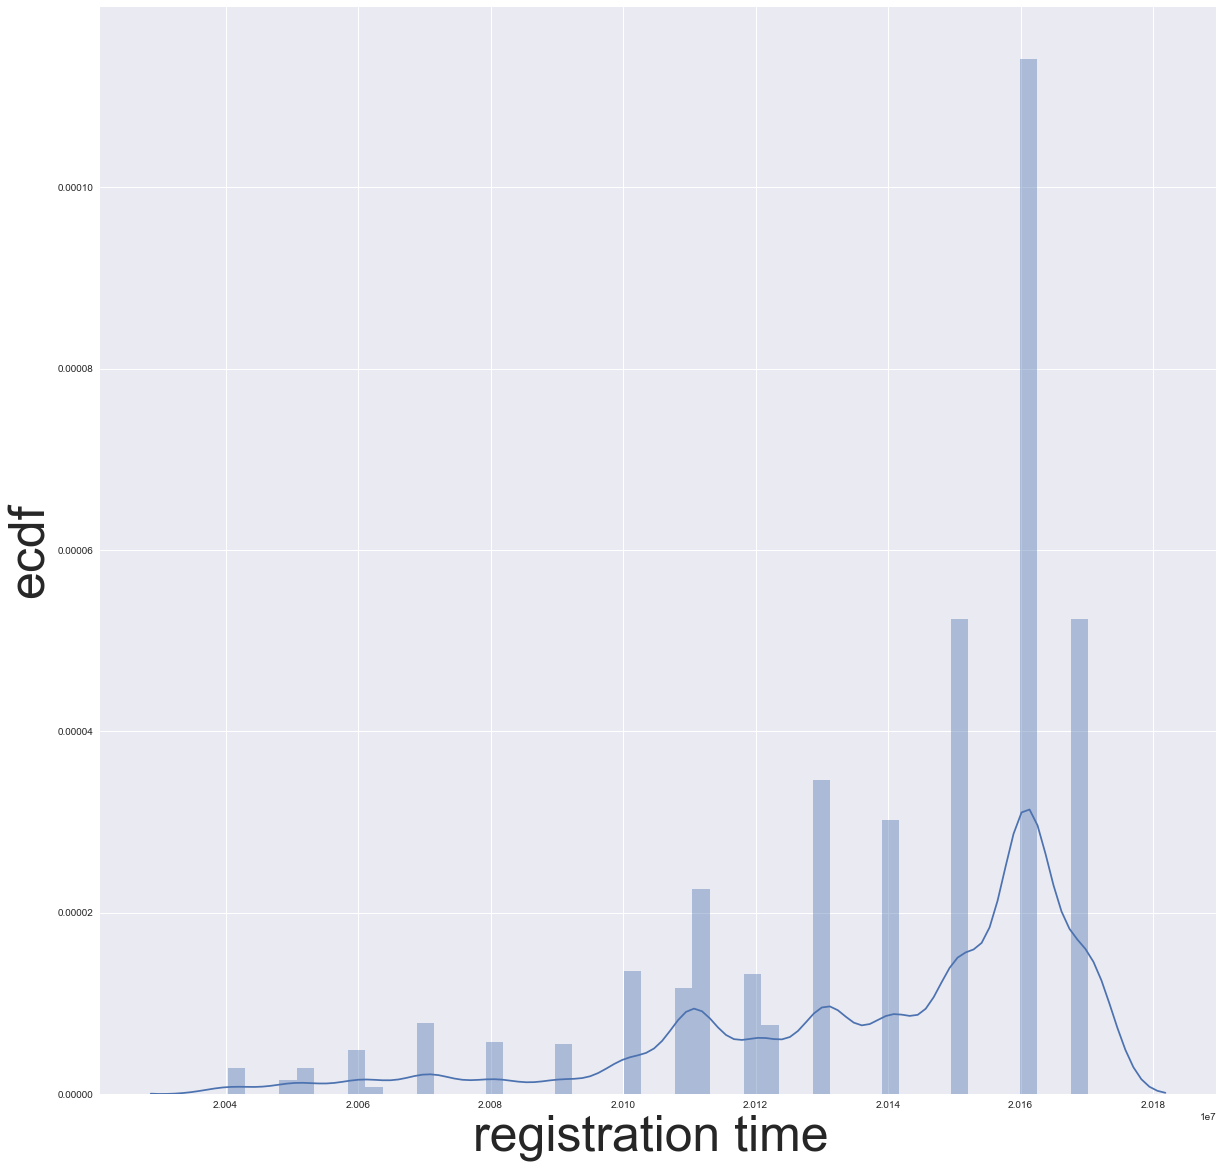

In [16]:
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.ylabel('ecdf',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)



# inferences we can drawn from above two result that maximum registration were done in time period of 2012 to 2016 and most this righthand skewed graph one more thing before applying we have to normalize it 

In [17]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [18]:
songs.describe()

,song_length,language
count,3.999900e+04,39999.000000
mean,2.462405e+05,26.471512
std,1.227400e+05,23.325434
min,4.922000e+03,-1.000000
25%,1.994120e+05,3.000000
50%,2.336390e+05,24.000000
75%,2.731475e+05,52.000000
max,4.748341e+06,59.000000


In [19]:
train.describe()

,target
count,19999.000000
mean,0.762188
std,0.425754
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19932 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 937.5+ KB


In [21]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


# we can see that in members and songs csv files large differences bet min and max values which gives inferences that there are outliers in the csv files which has to be removed before making system 

# Data conversion of int , float and categorical has to be done to reduce the data size for computation as well as storage 

In [22]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [23]:
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

       id                                          msno  \
0     0.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1  2954.0  mp5bRgC7VAhEpWlAiOn4jG8CD9FJZt7725f93t5i99M=   
2     1.0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
3   633.0  JXkYMYNrobJ3hctOnaKNM7NbhgmyxEWJZTBD4yehfCU=   
4  1745.0  yyDmZtawawvo2eqiFUlQbvmvHied65Ye+6KsMEpmoho=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
2  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
3  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
4  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   

    source_screen_name          source_type  city    bd  gender  \
0  Local playlist more        local-library   1.0   0.0     NaN   
1               Search                 song   1.0   0.0     NaN   
2  Local playlist more       

In [24]:
del train_members
del test_members

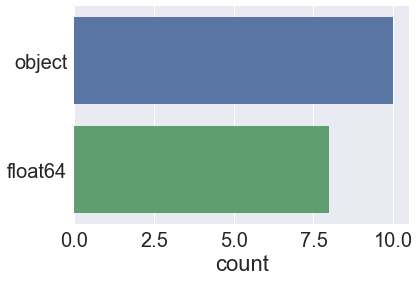

In [25]:
ax = sns.countplot(y=train_merged.dtypes, data=train_merged)

In [26]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('float64'): Index(['target', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}
{dtype('float64'): Index(['id', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


# Analysis on missing values 


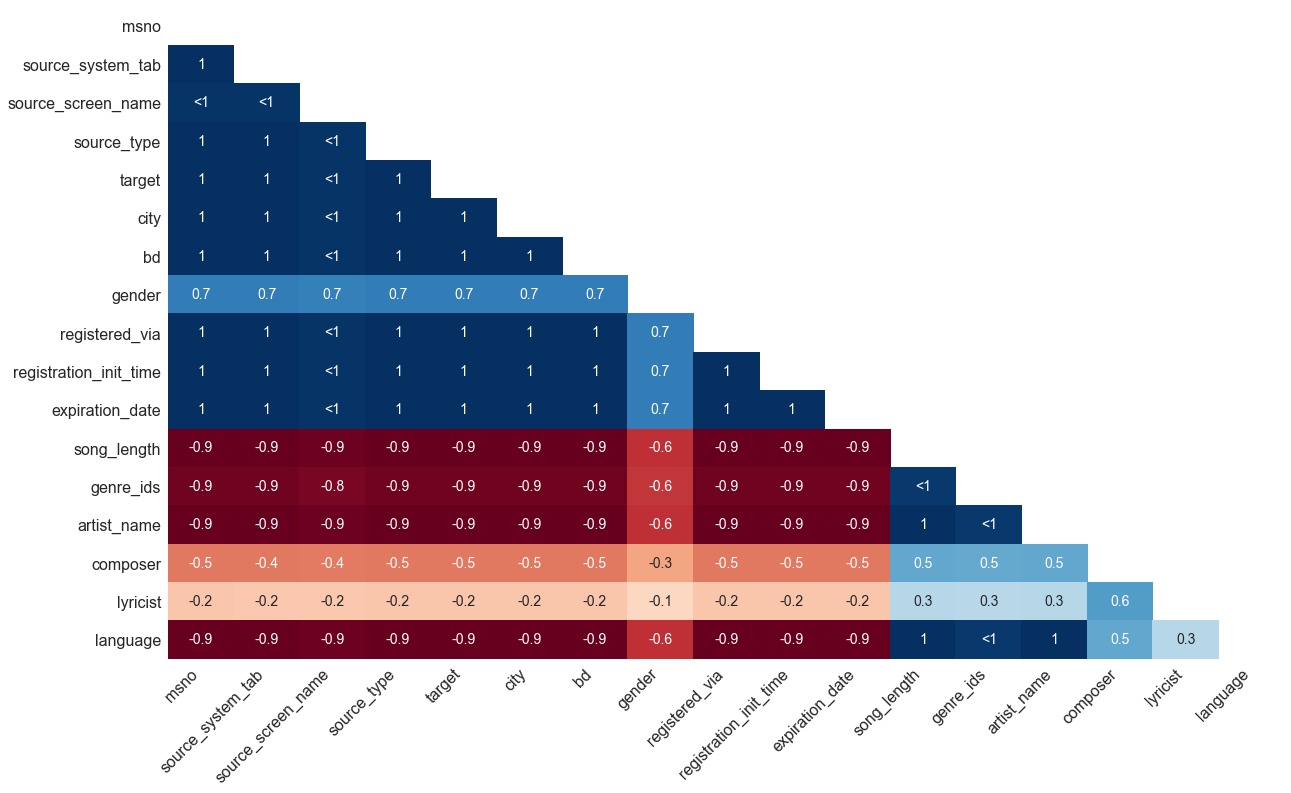

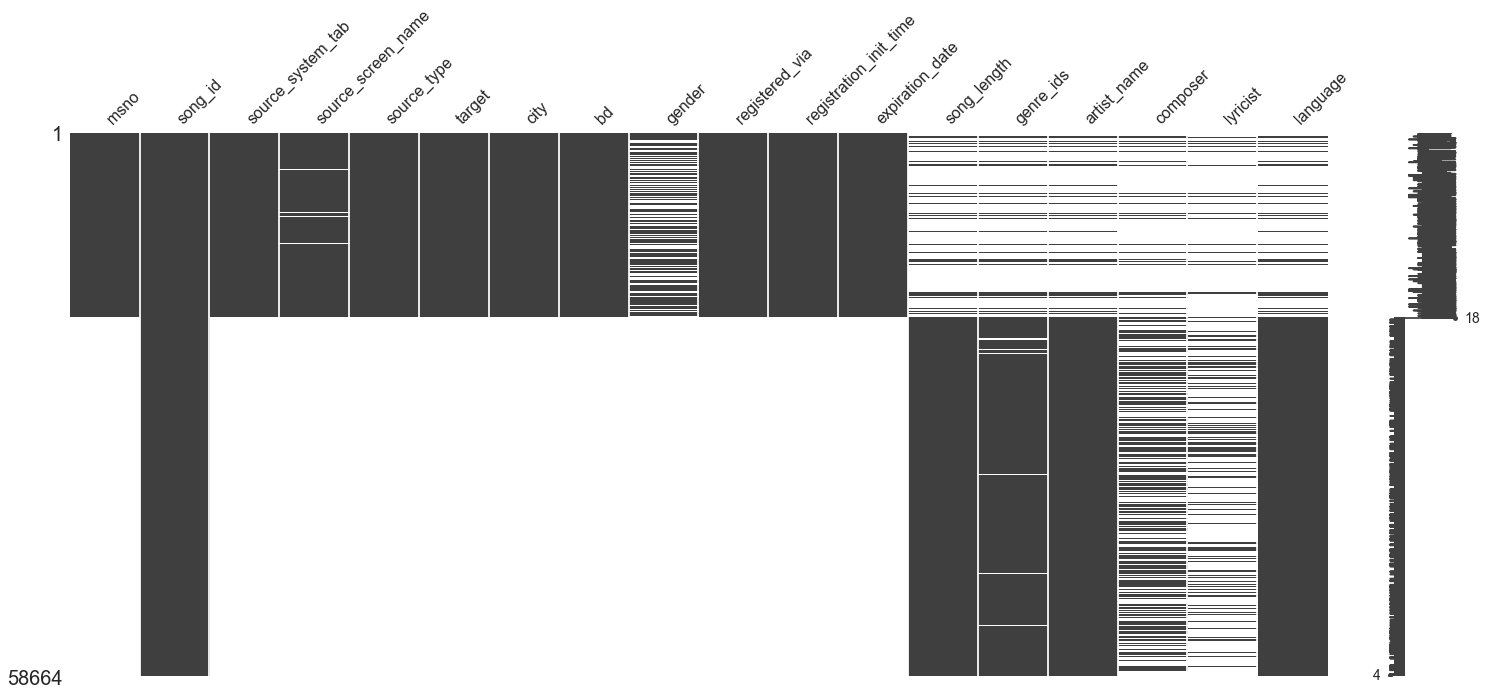

In [27]:
msno.heatmap(train_merged)
msno.matrix(train_merged)

# as we can see lot of missing values are coming up but when common thing we notice that most of the missing values are arrived from members and songs


# missing values from the heatmap also showing one thing that information which are missing and has positive correlation are gender with 4 variables of train.csv and rest of varibales with members.csv

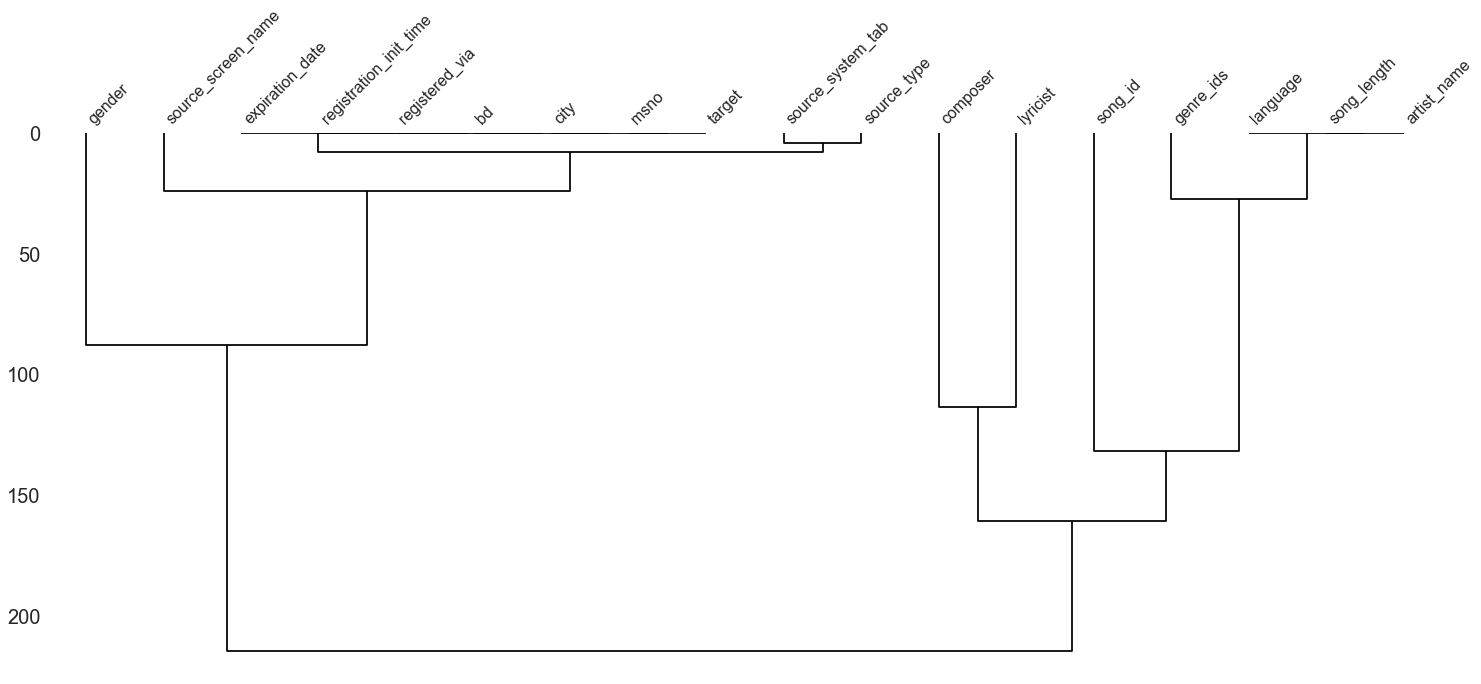

In [28]:
msno.dendrogram(train_merged)

# A strong nullity correlation here we can see 
# song id -> lang, song_len,artist name, genre_id
# composer -> lyricst
# gender -> with song_id

# from heatmap we can say if gender is missing 70% missing values will be in msno , target city etc 

# Now checking missing values and replacing them with some unique values 

<img src="download.png" style="height:500px">

In [29]:
#--- Function to check if missing values are present and if so print the columns having them ---
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    print(columns_with_Nan)
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154
True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time

In [30]:
#--- Function to replace Nan values in columns of type float with -5 ---
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

In [31]:
#--- memory consumed by train dataframe ---
mem = train_merged.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))
 
#--- memory consumed by test dataframe ---
mem = test_merged.memory_usage(index=True).sum()
print("Memory consumed by test set      :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   8.50384521484375 MB
Memory consumed by test set      :   6.453987121582031 MB


In [32]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)          

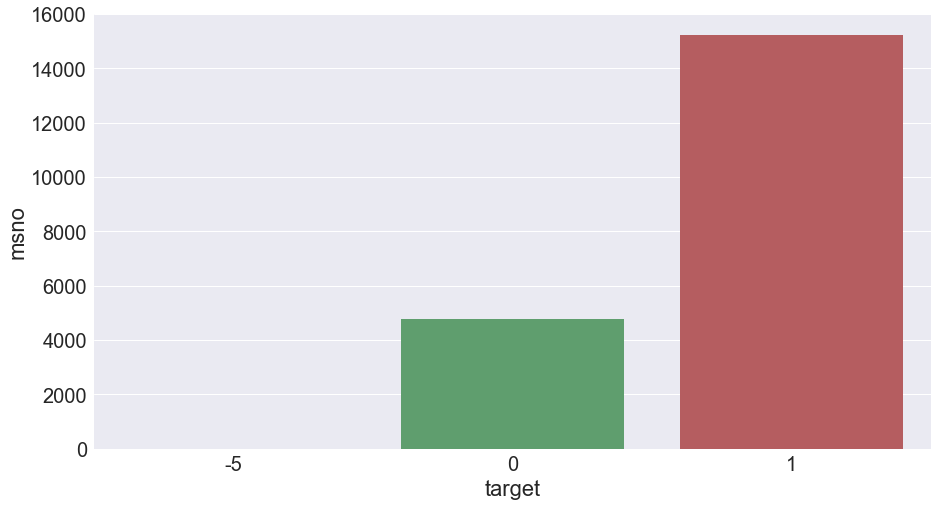

In [33]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

# as we can see that new user are about 5500 and old users about 15000  , 
# *-5 are those values which are empty 


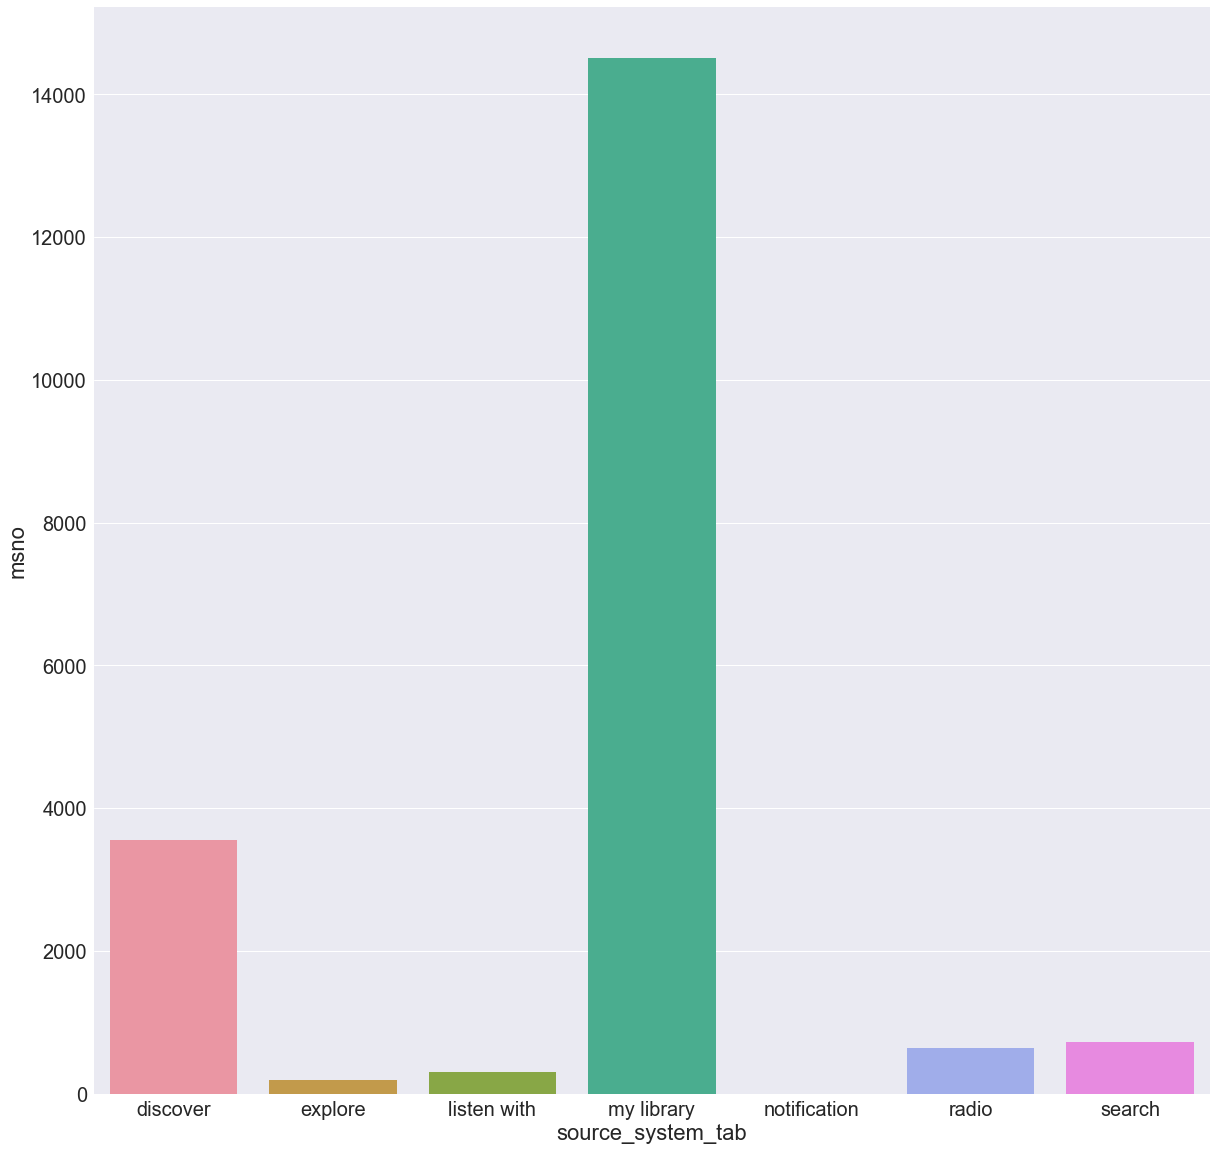

In [34]:
mpl.rcParams['font.size'] = 40.0
plt.figure(figsize = (20, 20)) 
data=train_merged.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
sns.barplot(x='source_system_tab',y='msno',data=data)

[Text(0,0,'Album more'),
 Text(0,0,'Artist more'),
 Text(0,0,'Discover Chart'),
 Text(0,0,'Discover Feature'),
 Text(0,0,'Discover Genre'),
 Text(0,0,'Discover New'),
 Text(0,0,'Explore'),
 Text(0,0,'Local playlist more'),
 Text(0,0,'My library'),
 Text(0,0,'My library_Search'),
 Text(0,0,'Online playlist more'),
 Text(0,0,'Others profile more'),
 Text(0,0,'Radio'),
 Text(0,0,'Search'),
 Text(0,0,'Search Home'),
 Text(0,0,'Search Trends'),
 Text(0,0,'Unknown')]

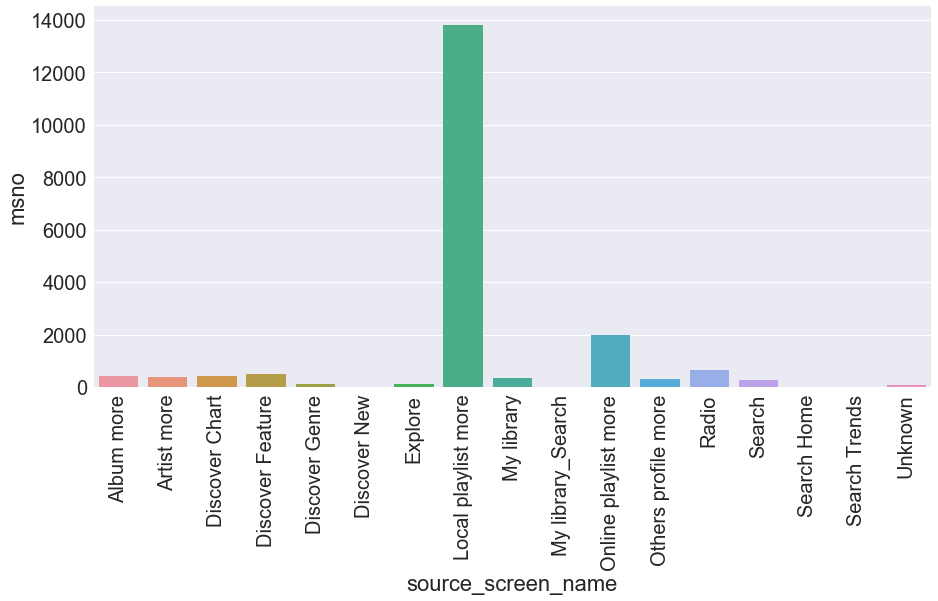

In [35]:
data = train_merged.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'album'),
 Text(0,0,'artist'),
 Text(0,0,'listen-with'),
 Text(0,0,'local-library'),
 Text(0,0,'local-playlist'),
 Text(0,0,'online-playlist'),
 Text(0,0,'radio'),
 Text(0,0,'song'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'topic-article-playlist')]

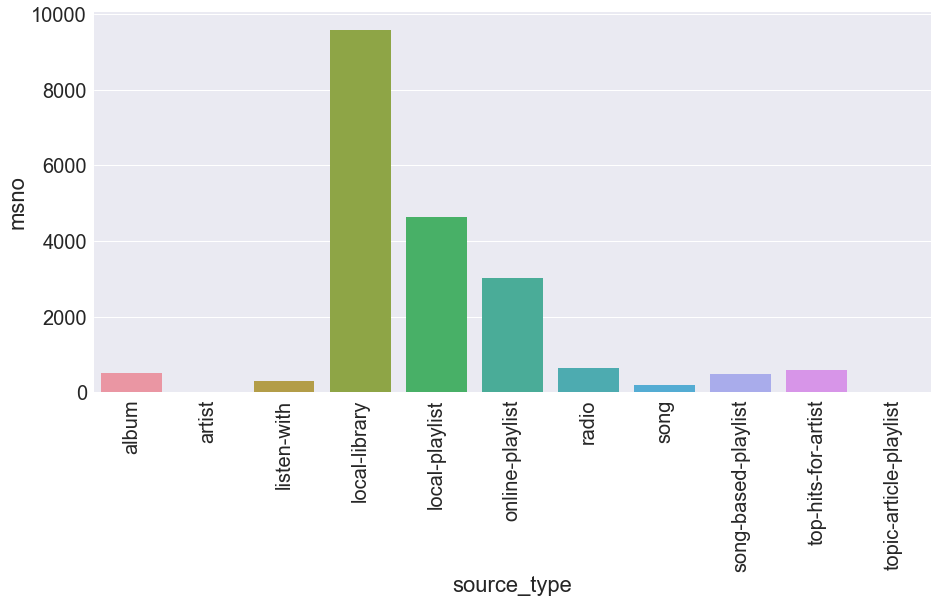

In [36]:
data = train_merged.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'-5'),
 Text(0,0,'-1'),
 Text(0,0,'3'),
 Text(0,0,'10'),
 Text(0,0,'17'),
 Text(0,0,'24'),
 Text(0,0,'31'),
 Text(0,0,'38'),
 Text(0,0,'45'),
 Text(0,0,'52'),
 Text(0,0,'59')]

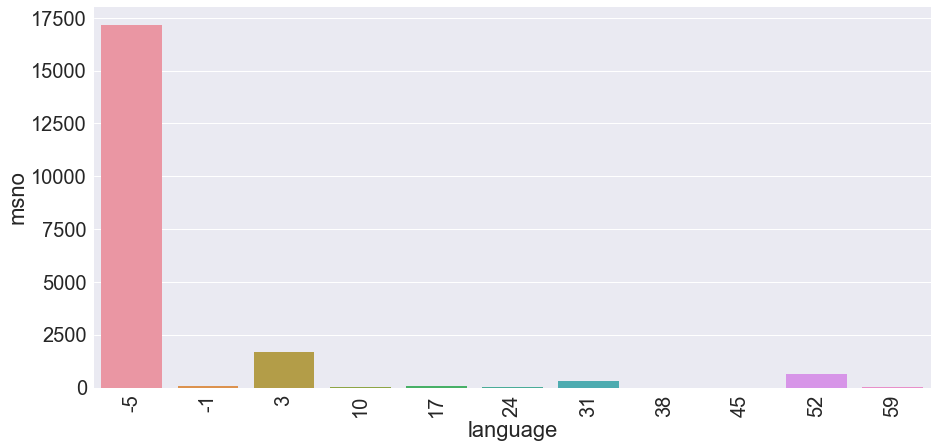

In [37]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='language', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'-5'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'7'),
 Text(0,0,'9'),
 Text(0,0,'13')]

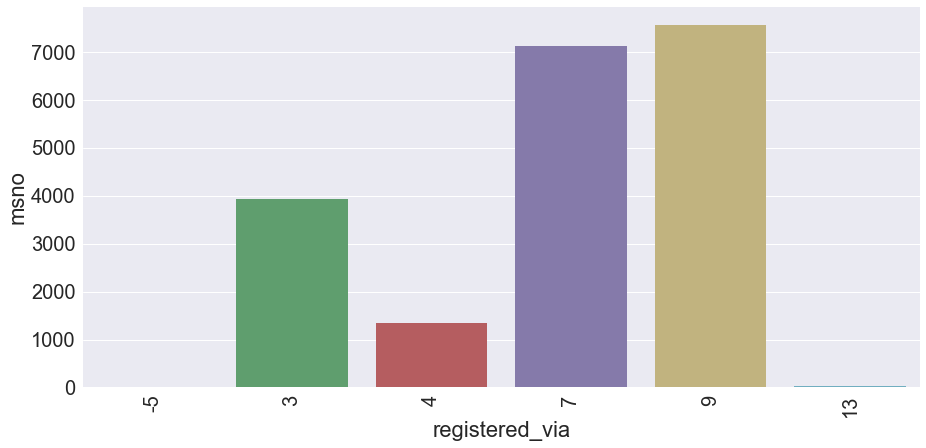

In [38]:
data = train_merged.groupby('registered_via').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='registered_via', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# most users 7 and 9 ways to get registered

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language'],
      dtype='object')


[Text(0,0,'-5'),
 Text(0,0,'1'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22')]

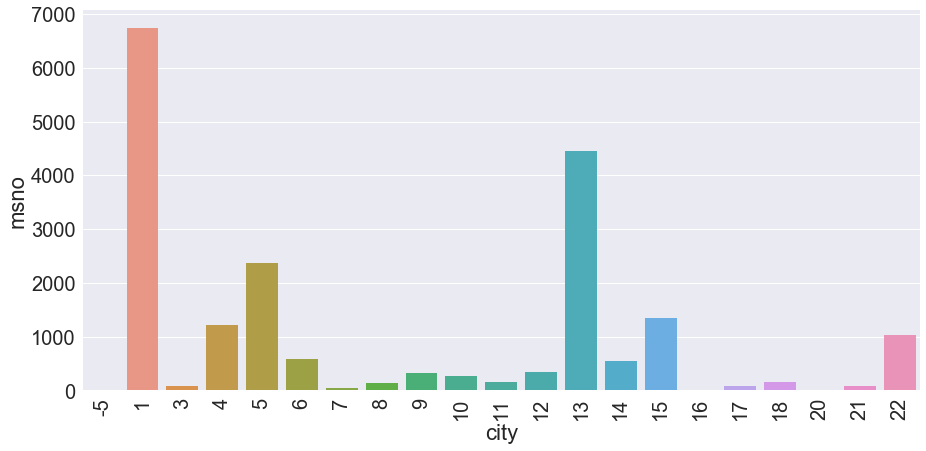

In [39]:
print(train_merged.columns)
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# no of users are 1,13,5 are containig maximum values 

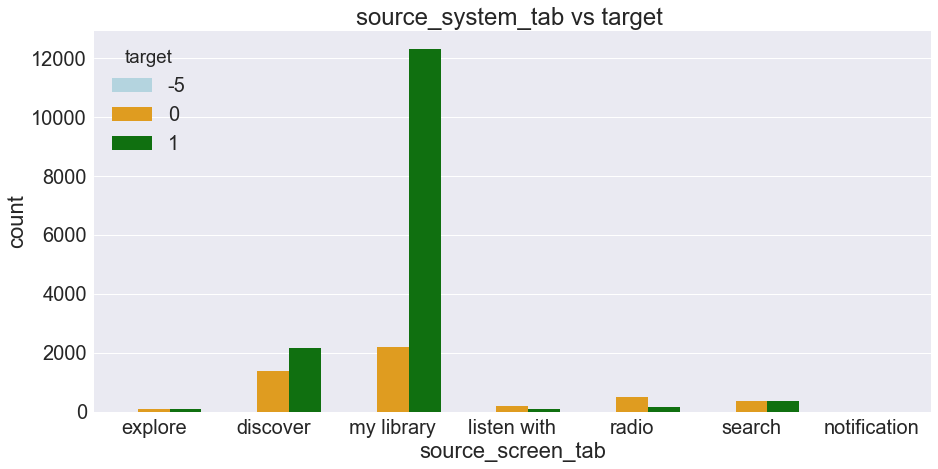

In [40]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_system_tab",data=train_merged,palette=['lightblue','orange','green'],hue="target")
plt.xlabel("source_screen_tab")
plt.ylabel("count")
plt.title("source_system_tab vs target ")
plt.show()

# new user are coming form discover and my llibrary and old ones are from my library

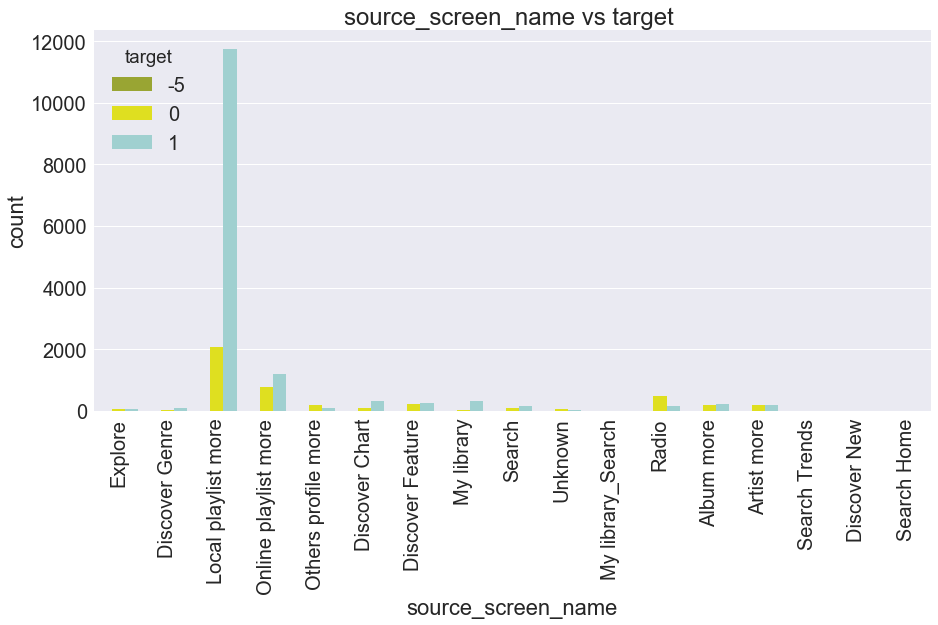

In [41]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="source_screen_name",data=train_merged,palette=['#A8B820','yellow','#98D8D8'],hue="target")
plt.xlabel("source_screen_name")
plt.ylabel("count")
plt.title("source_screen_name vs target ")
plt.xticks(rotation='90')
plt.show()

# local playlist among new user and old one more most common way to get back their songs

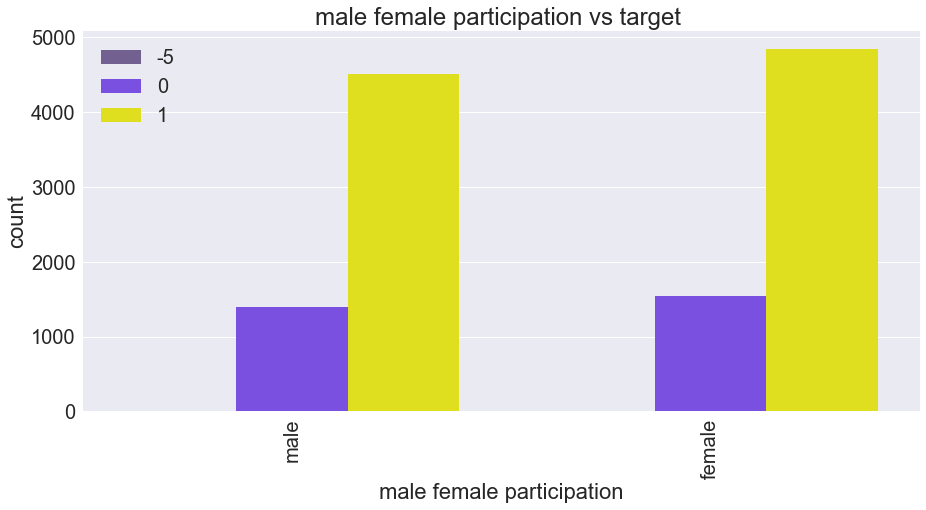

In [42]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.countplot(x="gender",data=train_merged,palette=['#705898','#7038F8','yellow'],hue="target")
plt.xlabel("male female participation")
plt.ylabel("count")
plt.title("male female participation vs target ")
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

# new female users are more than male users about 500 to 600

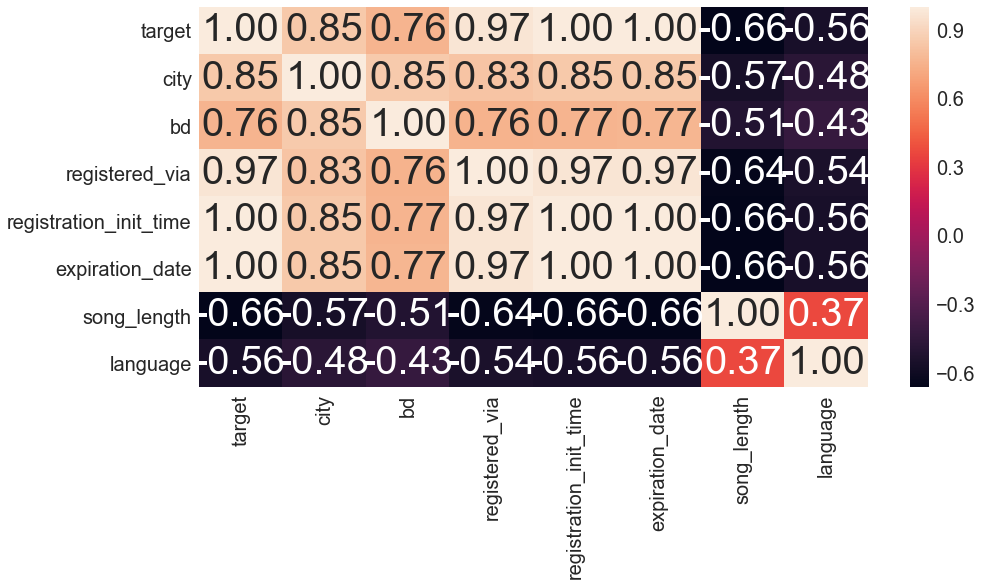

In [43]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.heatmap(data=train_merged.corr(),annot=True,fmt=".2f")

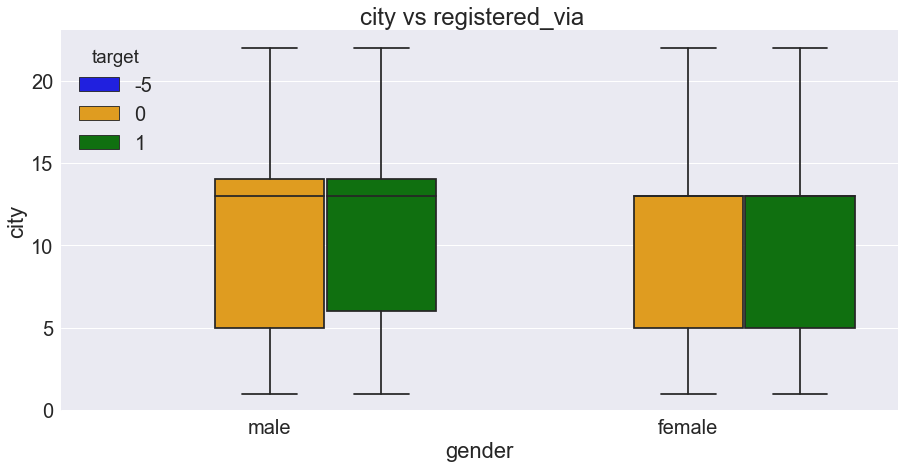

In [44]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="gender",y="city",data=train_merged,palette=['blue','orange','green'],hue="target")
plt.xlabel("gender")
plt.ylabel("city")
plt.title("city vs registered_via  ")
plt.show()

# here we can see that most of our user are between 5 to 14 no of cities might be female ratio is same 

# avg no of male users are 13 to 15 city no 

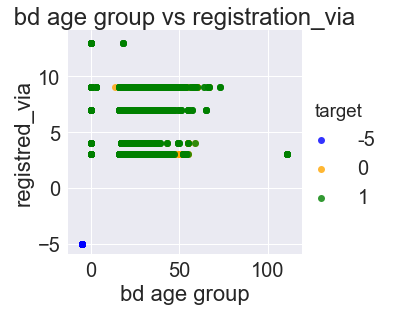

In [45]:
ax=sns.lmplot(x="bd",y="registered_via",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("registred_via")
plt.title(" bd age group vs registration_via ")
plt.show()

# now we can see on thing that music users vary age form 0 to 100 we can see here are outliers to in bd but interesting information are that most users age group of younsters and 30+ age group form 5 to 10 registered_via index

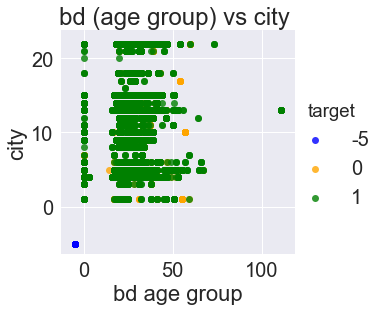

In [46]:
ax=sns.lmplot(x="bd",y="city",data=train_merged,palette=['blue','orange','green'],hue="target",fit_reg=False)
plt.xlabel("bd age group")
plt.ylabel("city")
plt.title("bd (age group) vs city ")
plt.show()

# with outlier as we can we didn't remove till now we will remove bd outliers at final stages before applying Ml but that last results insights are telling we have age group 20 to 30+ ages and city index we most 5 to 14 

In [47]:
#remomving outlier from bd age group column

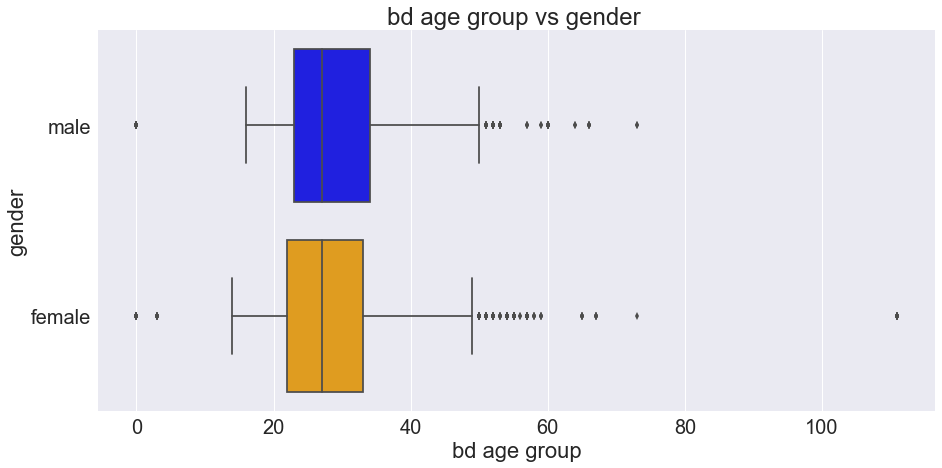

In [48]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="bd",y="gender",data=train_merged,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

# as we can see that mean age group we have 24 to 27 with max is 50 in female case and in male case 48 about age group is max and  min in female it is about 16 and in male case 18 

# one more observation we can see that female outlier are more there reason behind this logic females always tend fill up the things in hurry way because in male we can't see male with 100 , as if this bit funny logic , apart from this it all due unclean data that's it which we have to remove outliers

In [49]:
train_merged.describe()
def remove_outlier(df_in, col_name):

    #q1 = df_in[col_name].quantile(0.25)
    #q3 = df_in[col_name].quantile(0.75)
    #iqr = q3-q1 #Interquartile range
    fence_low  = 12
    fence_high = 45
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_final_train=remove_outlier(train_merged,'bd')

In [50]:
df_final_train.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,11727.000000,11727.000000,11727.000000,11727.000000,1.172700e+04,1.172700e+04,11727.00000,11727.000000
mean,0.766181,11.141213,27.881641,6.808988,2.011899e+07,2.017231e+07,34707.01100,-1.756630
std,0.423277,5.202895,6.358992,2.664223,3.049009e+04,3.914865e+03,86835.67475,11.091272
min,0.000000,1.000000,14.000000,3.000000,2.004033e+07,2.016021e+07,-5.00000,-5.000000
25%,1.000000,5.000000,23.000000,3.000000,2.010112e+07,2.017091e+07,-5.00000,-5.000000
50%,1.000000,13.000000,27.000000,9.000000,2.012093e+07,2.017093e+07,-5.00000,-5.000000
75%,1.000000,13.000000,32.000000,9.000000,2.014111e+07,2.017103e+07,-5.00000,-5.000000
max,1.000000,22.000000,44.000000,13.000000,2.016113e+07,2.019041e+07,491473.00000,59.000000


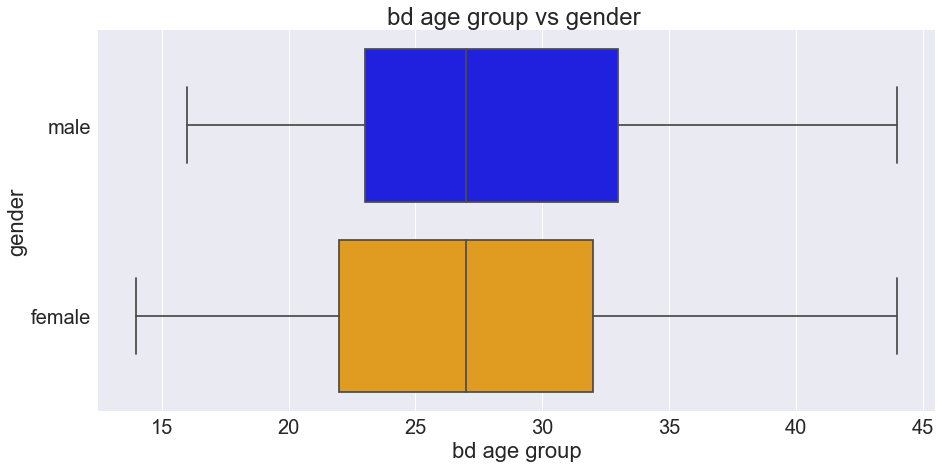

In [51]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="bd",y="gender",data=df_final_train,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

# i guess we have almost clean data in this data cleanning i used brute force approach as i get 0.75 percentile values as 0 so there is now way taking standard deviations so i used lookup approach to remove outliers special in this bd age group let's hope my system accurarcy don't went down 

# Now moving toward ML approach or machine learning 

<img src="2.jpg" style="height:500px">

# Clean the test data set

In [52]:
df_final_test=remove_outlier(test_merged,'bd')

In [53]:
df_final_test.describe()

,id,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,2585.000000,2585.000000,2585.000000,2585.000000,2.585000e+03,2.585000e+03,2585.000000,2585.000000
mean,2500.861509,11.609671,28.367892,6.995358,2.011922e+07,2.017196e+07,34528.598066,-1.807737
std,1464.423815,5.959524,6.693683,2.596284,3.259886e+04,3.317498e+03,88179.807609,11.262170
min,3.000000,1.000000,16.000000,3.000000,2.004033e+07,2.015062e+07,-5.000000,-5.000000
25%,1198.000000,5.000000,24.000000,4.000000,2.010121e+07,2.017091e+07,-5.000000,-5.000000
50%,2479.000000,13.000000,27.000000,9.000000,2.012101e+07,2.017093e+07,-5.000000,-5.000000
75%,3760.000000,15.000000,33.000000,9.000000,2.015010e+07,2.017102e+07,-5.000000,-5.000000
max,4998.000000,22.000000,44.000000,13.000000,2.017013e+07,2.018112e+07,597216.000000,52.000000


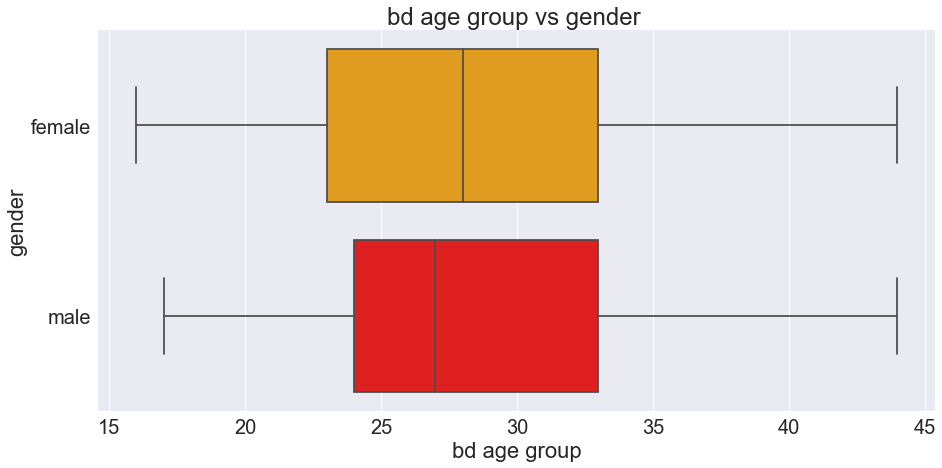

In [54]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(x="bd",y="gender",data=df_final_test,palette=['orange','red'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

# Now we ultimate clean data set 

# but not yet preprocssed so now preprocssing task  

# Why i'm making all the classification with trees only there is reason behind that other trees algos are best for classifications , improving loss function in gradient boosters and xgboost that's why and another more reason like why not svm is not made for this type working , powerfull in case of text audio , images 

In [55]:
from sklearn.preprocessing import LabelEncoder
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

# Merge datasets with song attributes
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

# Merge datasets with member features
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

train = train.fillna(-1)
test = test.fillna(-1)

del members, songs; gc.collect();

cols = list(train.columns)
cols.remove('target')

for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 26.16it/s]


In [56]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,881,2499,2,7,7,1,0,0,-1.0,-1.0,1,0,0,7,5,2012,1,2,2017,10
1,1820,7389,4,8,5,1,0,0,-1.0,-1.0,13,24,1,9,11,2011,5,25,2017,9
2,1820,4005,4,8,5,1,0,0,-1.0,-1.0,13,24,1,9,11,2011,5,25,2017,9
3,1820,798,4,8,5,1,0,0,-1.0,-1.0,13,24,1,9,11,2011,5,25,2017,9
4,881,1147,2,7,7,1,0,0,-1.0,-1.0,1,0,0,7,5,2012,1,2,2017,10


In [57]:
train.shape

(19999, 20)

In [58]:
test.shape

(39999, 20)

In [59]:
train.columns


Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'artist_name', 'genre_ids', 'song_length',
       'language', 'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [60]:
columntitles=['target','msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type','artist_name', 'genre_ids', 'song_length',
       'language', 'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month']

In [61]:
train=train.reindex(columns=columntitles)

In [62]:
train.columns

Index(['target', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'artist_name', 'genre_ids', 'song_length', 'language',
       'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [63]:
x = train.iloc[:,1:]
y = train['target'].values

In [64]:
print("independent variable shape")
print(x.shape)
print("dependent variable shape")
print(y.shape)

independent variable shape
(19999, 19)
dependent variable shape
(19999,)


In [65]:
test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'artist_name', 'genre_ids', 'song_length', 'language',
       'city', 'bd', 'gender', 'registered_via', 'expiration_date',
       'registration_year', 'registration_month', 'registration_date',
       'expiration_year', 'expiration_month'],
      dtype='object')

In [66]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0.0,1658,6471,4,8,4,0,0,-1.0,-1.0,1.0,0.0,0,7.0,18.0,2016.0,2.0,19.0,2017.0,9.0
1,1.0,1658,11606,4,8,4,588,32,320470.0,3.0,1.0,0.0,0,7.0,18.0,2016.0,2.0,19.0,2017.0,9.0
2,2.0,96,2040,1,0,10,422,13,315899.0,17.0,1.0,0.0,0,4.0,24.0,2016.0,11.0,17.0,2016.0,11.0
3,3.0,189,11940,6,13,8,0,0,-1.0,-1.0,3.0,30.0,2,9.0,30.0,2007.0,7.0,25.0,2017.0,4.0
4,4.0,189,4539,6,13,8,0,0,-1.0,-1.0,3.0,30.0,2,9.0,30.0,2007.0,7.0,25.0,2017.0,4.0


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

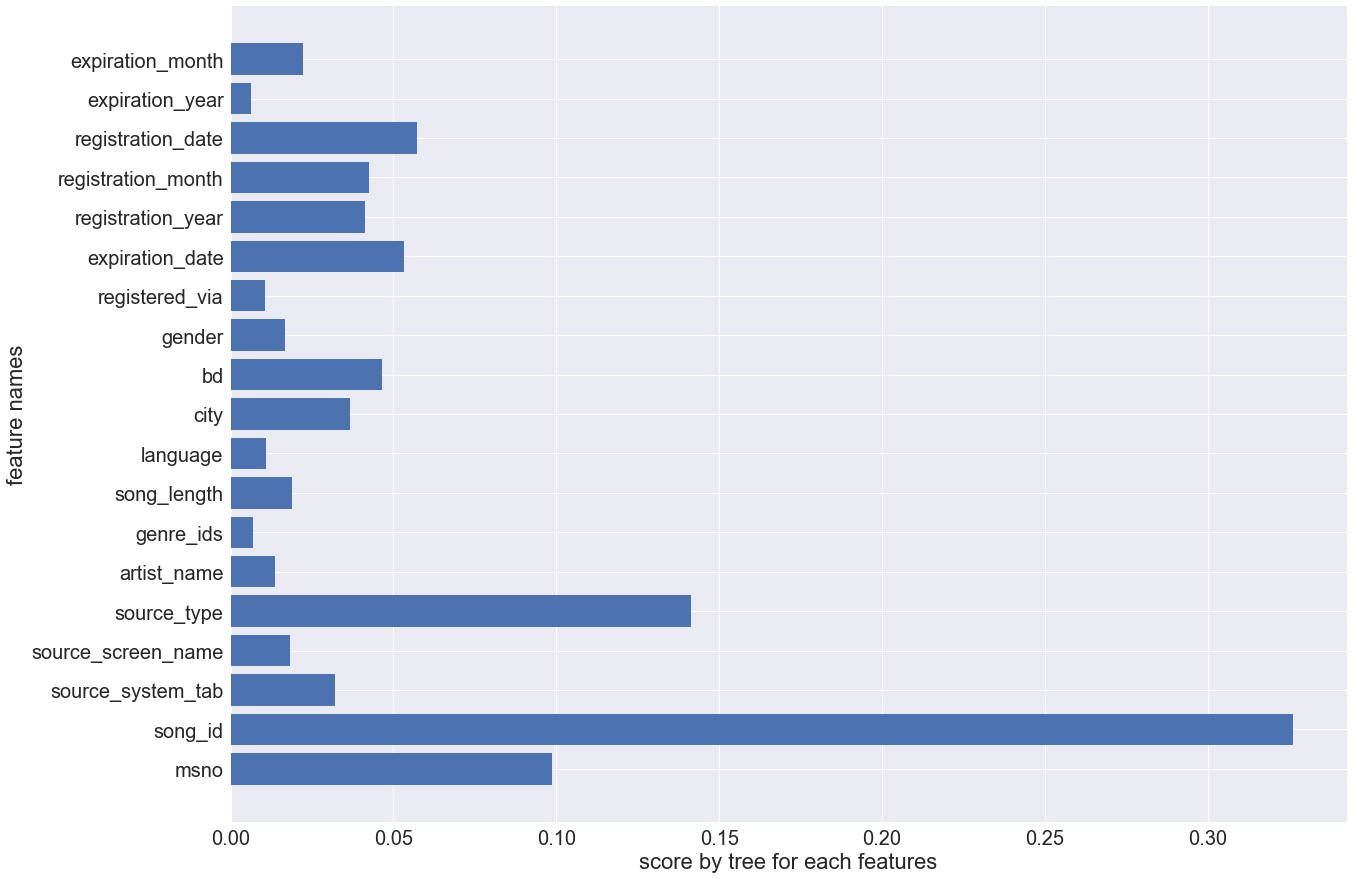

In [68]:
plt.figure(figsize=(20,15))
n_features=len(train.columns[1:])
plt.barh(range(n_features),tree.feature_importances_)
plt.yticks(np.arange(n_features),train.columns[1:])
plt.xlabel('score by tree for each features')
plt.ylabel('feature names')
plt.show()

In [69]:
import pydotplus

In [70]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['0',"1"],
    feature_names=train.columns[1:],impurity=True,filled=True)


# from above results i can see that very few features are being recognised impactfull in decision making song_id, msno , source_type 

# best params for decision tree classifier

In [71]:
max_depth=range(1,15)
max_features=range(1,16)
max_leaf_nodes=range(2,15)
criterion=['gini','entropy']
gridparams=dict(max_depth=max_depth,max_features=max_features,
max_leaf_nodes=max_leaf_nodes,
criterion=criterion)

# SO WITH DECISION TREE OUR accuracy is about 0.78----------

# lets go with extra trees

In [72]:
exttrees=ExtraTreeClassifier()
exttrees.fit(x_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [73]:
exttrees.score(x_test,y_test)

0.8032

# so we can decision tree was much better than extra trees classifier

In [74]:
tree=DecisionTreeClassifier(criterion='gini', max_depth=14, max_features=14, max_leaf_nodes=14)
tree.fit(x_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, tree.predict(x_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, tree.predict(x_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.59
             precision    recall  f1-score   support

          0       0.64      0.21      0.32      1176
          1       0.80      0.96      0.87      3824

avg / total       0.76      0.79      0.74      5000



# here decision tree at it's final showoff can expect too much from this one 


In [75]:
exttrees=ExtraTreeClassifier(criterion='entropy', max_depth=12, max_features=15, max_leaf_nodes=14)
exttrees.fit(x_train,y_train)
print ("\n\n ---Extra Tree Model---")
dt_roc_auc = roc_auc_score(y_test, exttrees.predict(x_test))
print ("extratrees Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, exttrees.predict(x_test)))



 ---Extra Tree Model---
extratrees Tree AUC = 0.57
             precision    recall  f1-score   support

          0       0.65      0.18      0.28      1176
          1       0.79      0.97      0.87      3824

avg / total       0.76      0.78      0.73      5000



# extra trees classifier perform much weak than decision tree now move towards ensemble learning 

In [76]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0,0.5,'features importance by random forest')

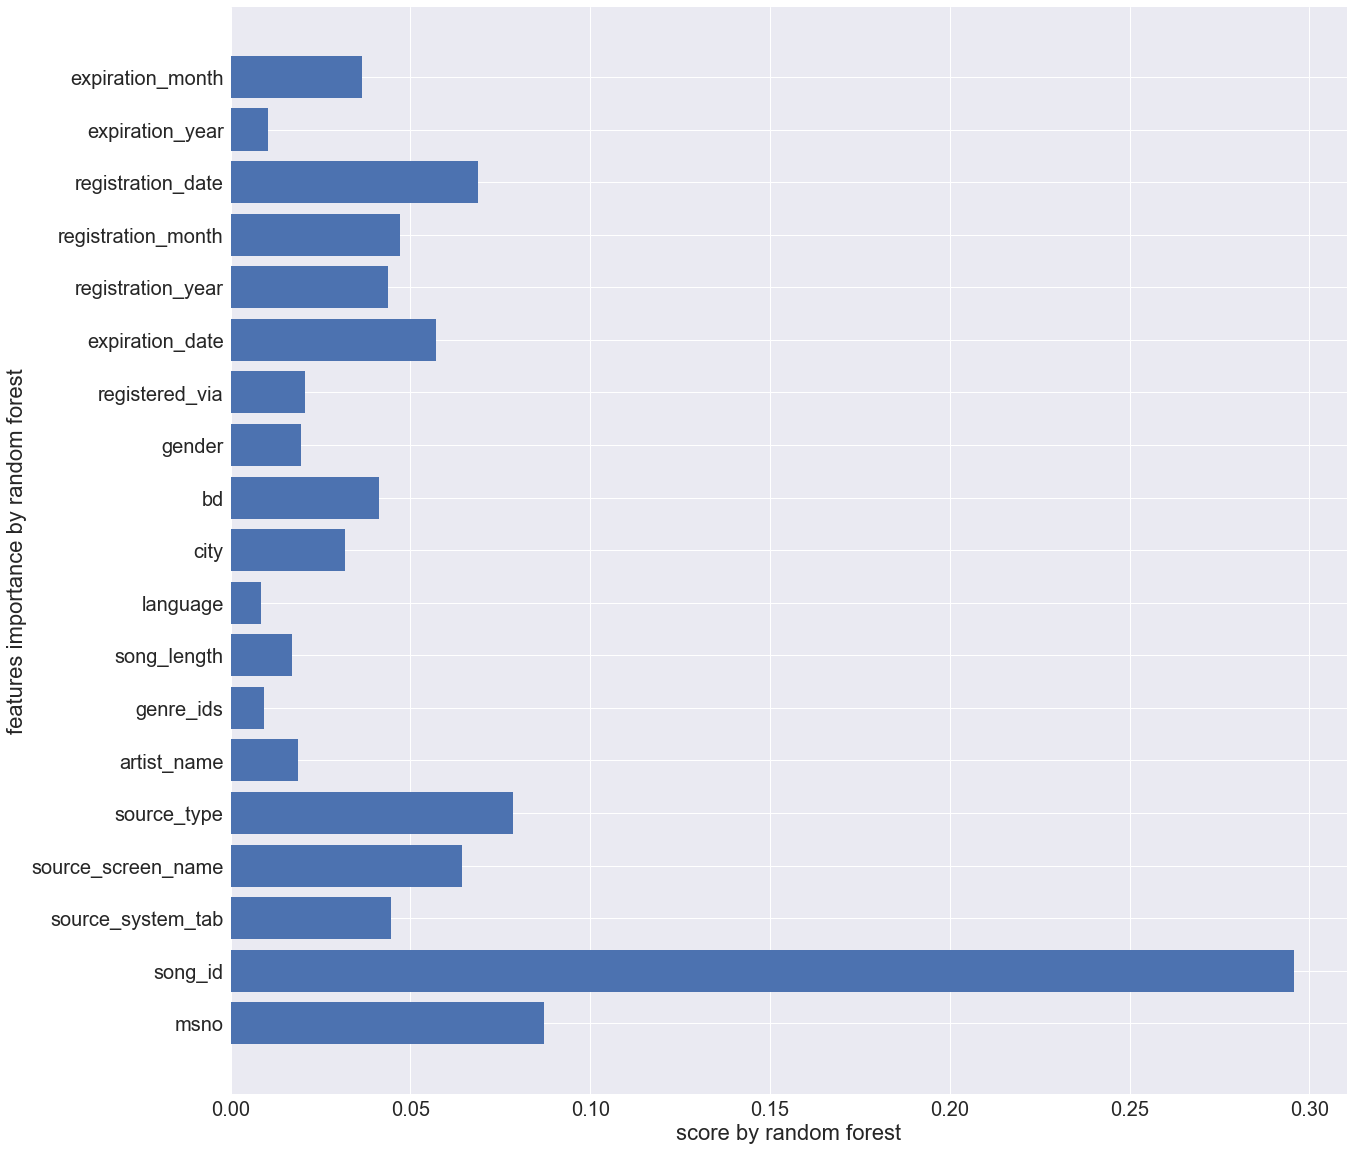

In [77]:
plt.figure(figsize=(20,20))
n_features1=len(train.columns[1:])
plt.barh(range(n_features1),forest.feature_importances_)
plt.yticks(np.arange(n_features1),train.columns[1:])
plt.xlabel('score by random forest')
plt.ylabel('features importance by random forest')

# 5 features now showing some impact with classifications 

In [78]:
forest=RandomForestClassifier(n_estimators=600,max_depth=10,n_jobs=-1,criterion='gini',max_features=15,max_leaf_nodes=15)
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.7904

# applying much more pruning we can see that rf model has jumped with 79.18 % accuracy rate

In [79]:
accuracy1=[]
accuracy0=[]
n_estimators=range(200,1000,100)
for n in n_estimators:
    forest=RandomForestClassifier(n_estimators=n,max_depth=10,n_jobs=-1,criterion='gini',max_features=15,max_leaf_nodes=15)
    forest.fit(x_train,y_train)
    accuracy1.append(forest.score(x_test,y_test))
    accuracy0.append(forest.score(x_train,y_train))

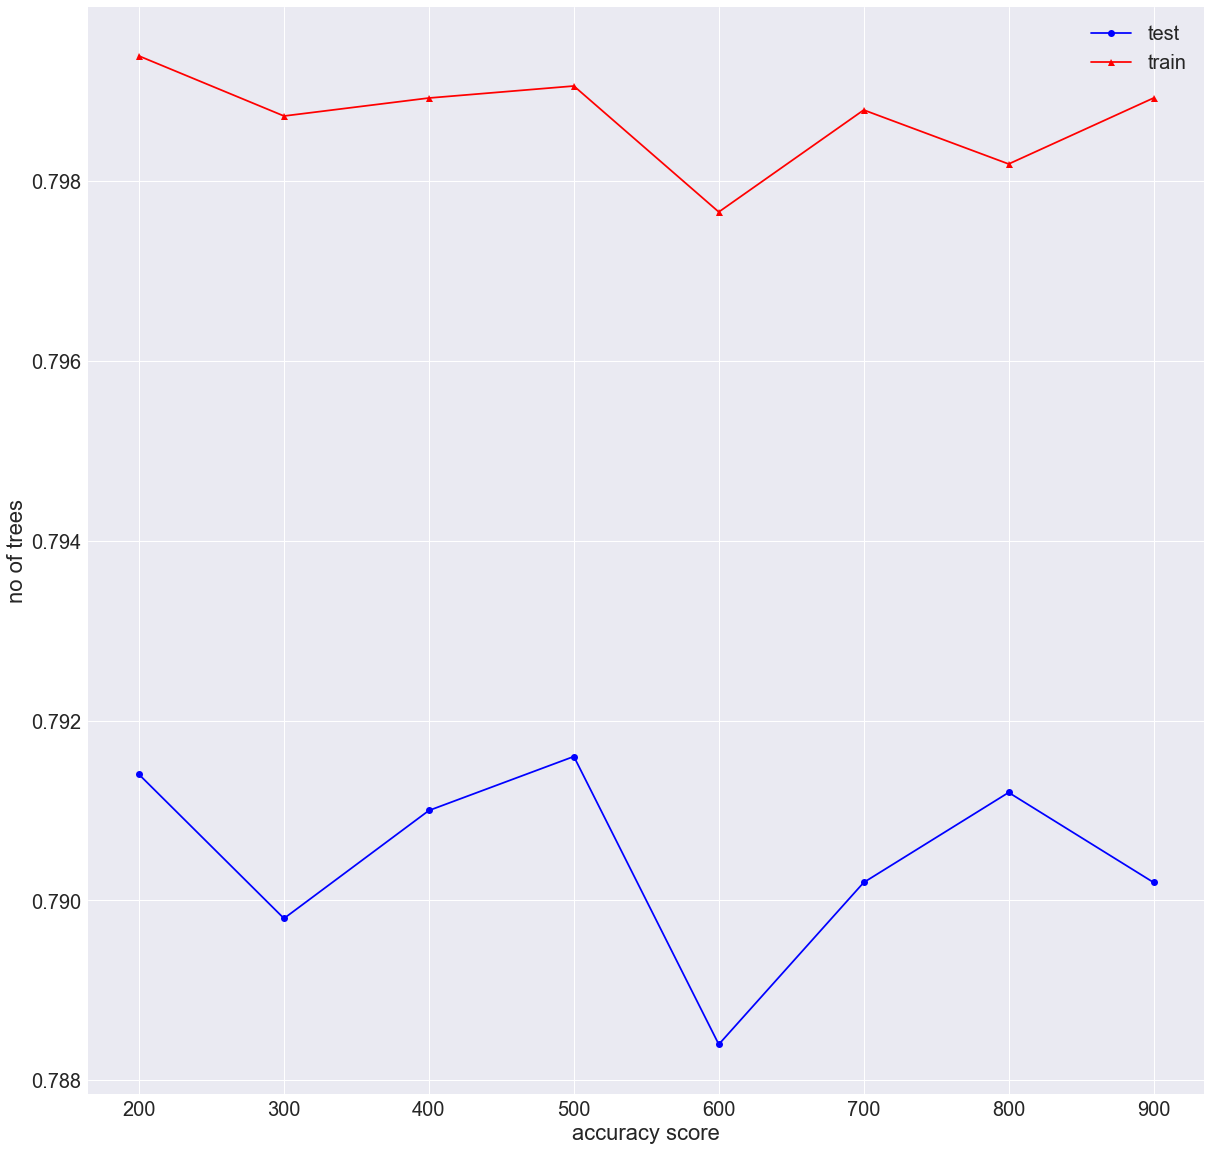

In [80]:
plt.figure(figsize=(20,20))    
plt.plot(n_estimators,accuracy1,'-o',color='blue',label="test")
plt.plot(n_estimators,accuracy0,'-^',color='red',label="train")
plt.xlabel('accuracy score')
plt.ylabel('no of trees')
plt.legend()
plt.show()

In [81]:
rmse0=[]
rmse1=[]
for n in n_estimators:
    forest=RandomForestClassifier(n_estimators=n,max_depth=10,n_jobs=-1,criterion='gini',max_features=15,max_leaf_nodes=15)
    forest.fit(x_train,y_train)
    y_pred0=forest.predict(x_train)
    y_pred1=forest.predict(x_test)
    rmse0.append(np.sqrt(mean_squared_error(y_pred0,y_train)))
    rmse1.append(np.sqrt(mean_squared_error(y_pred1,y_test)))

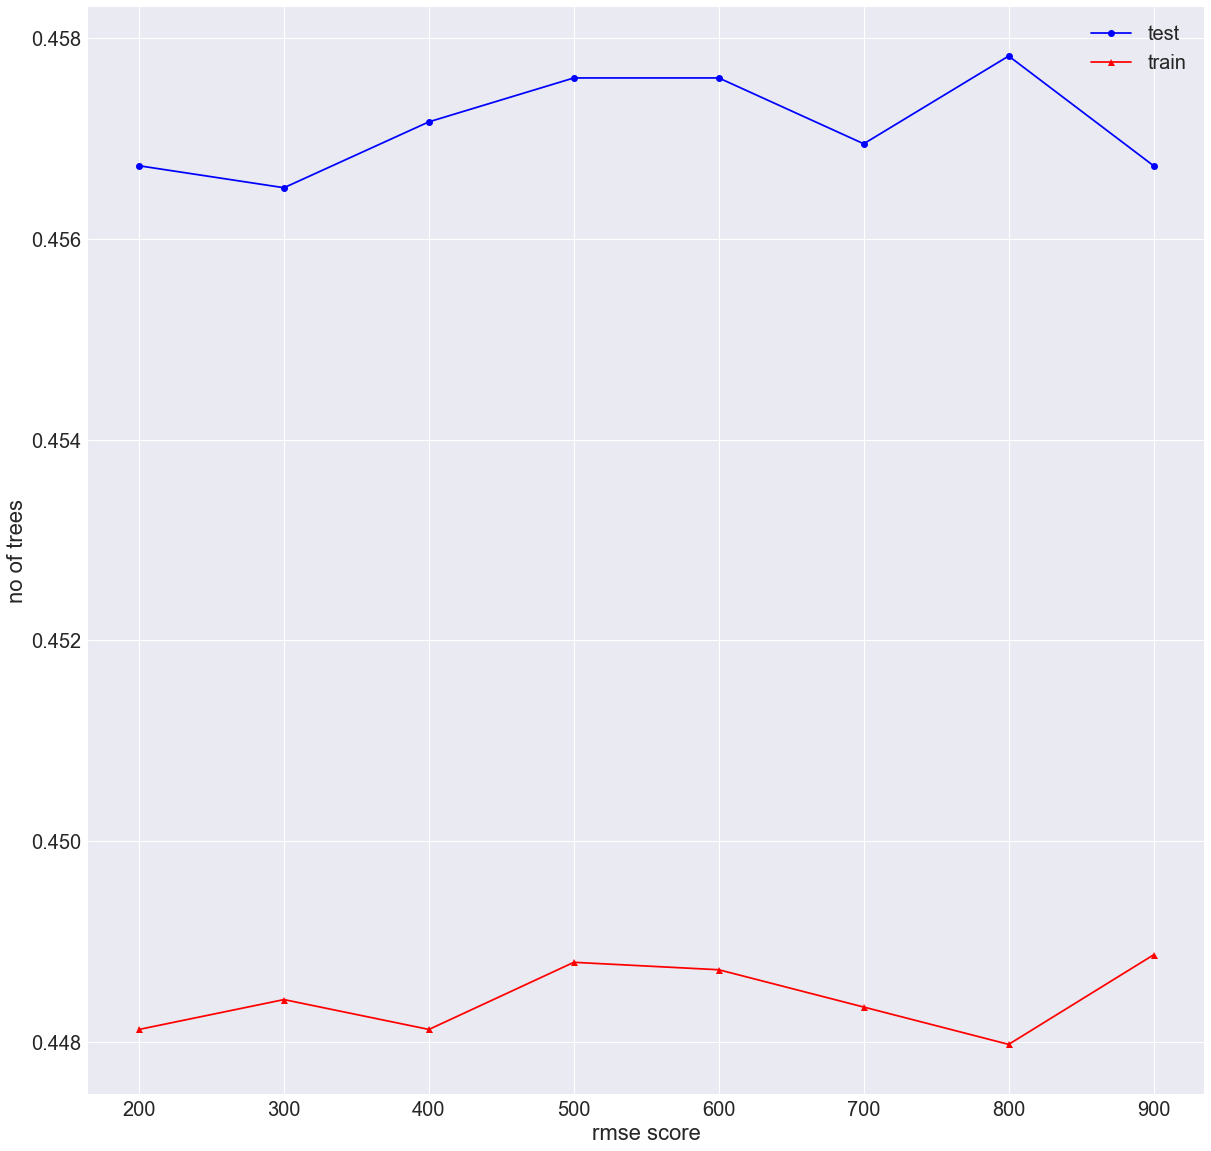

In [82]:
plt.figure(figsize=(20,20))    
plt.plot(n_estimators,rmse1,'-o',color='blue',label="test")
plt.plot(n_estimators,rmse0,'-^',color='red',label="train")
plt.xlabel('rmse score')
plt.ylabel('no of trees')
plt.legend()
plt.show()

# since our rmse scores are in between 0 to 1 we can move futher in ensemeble learning giving psotive vibes for gdbt , ada , xgboost

# auc_score for random forest 

In [83]:
forest=RandomForestClassifier(n_estimators=900,max_depth=10,n_jobs=-1,criterion='gini',max_features=15,max_leaf_nodes=15)
forest.fit(x_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, forest.predict(x_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, forest.predict(x_test)))



 ---Random Forest Model---
Random Forest AUC = 0.59
             precision    recall  f1-score   support

          0       0.67      0.21      0.32      1176
          1       0.80      0.97      0.88      3824

avg / total       0.77      0.79      0.75      5000



# as we can see that accuracy is more but still auc_score is very less 

In [166]:
import xgboost as xgb
from xgboost import plot_importance

In [167]:
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test)

In [168]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [169]:
num_round=100
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [170]:
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(0, 2, 185578)

In [171]:
ypred=xg.predict(dtest) 
ypred
ypred.shape

(5000,)

In [172]:
for i in range(0,5000): 
    if ypred[i]>=.5:       # setting threshold to .5 
        ypred[i]=1 
    else: 
        ypred[i]=0  

In [149]:
accuracy_xgb = accuracy_score(y_test,ypred) 
accuracy_xgb

0.7646

In [164]:
rmse_xgb = np.sqrt(mean_squared_error(y_test,ypred)) 
rmse_xgb

0.4855924216871594

In [173]:
print(accuracy_score(y_test,ypred))
roc_auc_xgb = roc_auc_score(y_test,ypred) 
roc_auc_xgb

0.7642


0.5007854083055816

In [102]:
params = {
    'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': -1, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}

# Initiate classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = -1, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

# To view the default model parameters:
mdl.get_params().keys()


dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [103]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1)
# Run the grid
grid.fit(x, y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 3456 candidates, totalling 13824 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 12

{'boosting_type': 'dart', 'colsample_bytree': 0.64, 'learning_rate': 0.005, 'max_bin': 255, 'n_estimators': 24, 'num_leaves': 16, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1.2, 'reg_lambda': 1, 'subsample': 0.75}
0.7862393119655983


In [240]:
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate'] 
params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

#X_test = np.array(test.drop(['id'], axis=1))
#ids = test['id'].values


X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state = 12)

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]
start=datetime.now()


model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=100, verbose_eval=4)
stop=datetime.now()
p_test = model.predict(X_valid)
for i in range(0,5000):
    if p_test[i]>=.5:       # setting threshold to .5
       p_test[i]=1
    else:  
       p_test[i]=0
accuracy_lgbm=accuracy_score(p_test,y_valid)
print(score)
auc_lgbm=roc_auc_score(p_test,y_valid)
execution_time_lgbm = stop-start
execution_time_lgbm

Training until validation scores don't improve for 100 rounds.
[4]	training's binary_error: 0.208414	valid_1's binary_error: 0.2018
[8]	training's binary_error: 0.213881	valid_1's binary_error: 0.206
[12]	training's binary_error: 0.212614	valid_1's binary_error: 0.2058
[16]	training's binary_error: 0.213281	valid_1's binary_error: 0.2066
[20]	training's binary_error: 0.212948	valid_1's binary_error: 0.2058
[24]	training's binary_error: 0.212481	valid_1's binary_error: 0.2058
[28]	training's binary_error: 0.213481	valid_1's binary_error: 0.2064
[32]	training's binary_error: 0.213414	valid_1's binary_error: 0.2066
[36]	training's binary_error: 0.212948	valid_1's binary_error: 0.2062
[40]	training's binary_error: 0.213814	valid_1's binary_error: 0.2068
[44]	training's binary_error: 0.213681	valid_1's binary_error: 0.2068
[48]	training's binary_error: 0.213814	valid_1's binary_error: 0.2066
[52]	training's binary_error: 0.213881	valid_1's binary_error: 0.2068
[56]	training's binary_error: 

datetime.timedelta(0, 0, 455254)

In [236]:
comparison_dict = {'accuracy score':(accuracy_lgbm,accuracy_xgb),'auc score':(auc_lgbm,roc_auc_xgb),'execution time':(execution_time_lgbm,execution_time_xgb)}

In [237]:
comparison_df = pd.DataFrame(comparison_dict) 
comparison_df.index= ['LightGBM','xgboost'] 
comparison_df

,accuracy score,auc score,execution time
LightGBM,0.7978,0.730116,00:00:00.397726
xgboost,0.7646,0.500785,00:00:02.185578


In [238]:
print ("\n\n ---LGBM---")
gbc_roc_auc = roc_auc_score(p_test,y_valid)
print ("LGBM AUC = %2.2f" % gbc_roc_auc)
print(classification_report(p_test, y_valid))



 ---LGBM---
LGBM AUC = 0.73
             precision    recall  f1-score   support

        0.0       0.25      0.65      0.36       443
        1.0       0.96      0.81      0.88      4557

avg / total       0.90      0.80      0.83      5000



In [197]:
print ("\n\n ---xgbm---")
print(roc_auc_xgb)

print(classification_report(y_valid,ypred))



 ---xgbm---
0.5007854083055816
             precision    recall  f1-score   support

          0       0.09      0.00      0.00      1142
          1       0.77      1.00      0.87      3858

avg / total       0.62      0.77      0.67      5000

